In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing Libraries
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

# Libraries for Model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# For checking accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')
csv_path = '/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv'
data = pd.read_csv(csv_path)
print(data.head())

Mounted at /content/drive
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [9]:
# Visualization Using Graphs

<ipython-input-10-552ea033a74c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'step'),
  Text(1.5, 0, 'amount'),
  Text(2.5, 0, 'oldbalanceOrg'),
  Text(3.5, 0, 'newbalanceOrig'),
  Text(4.5, 0, 'oldbalanceDest'),
  Text(5.5, 0, 'newbalanceDest'),
  Text(6.5, 0, 'isFraud'),
  Text(7.5, 0, 'isFlaggedFraud')])

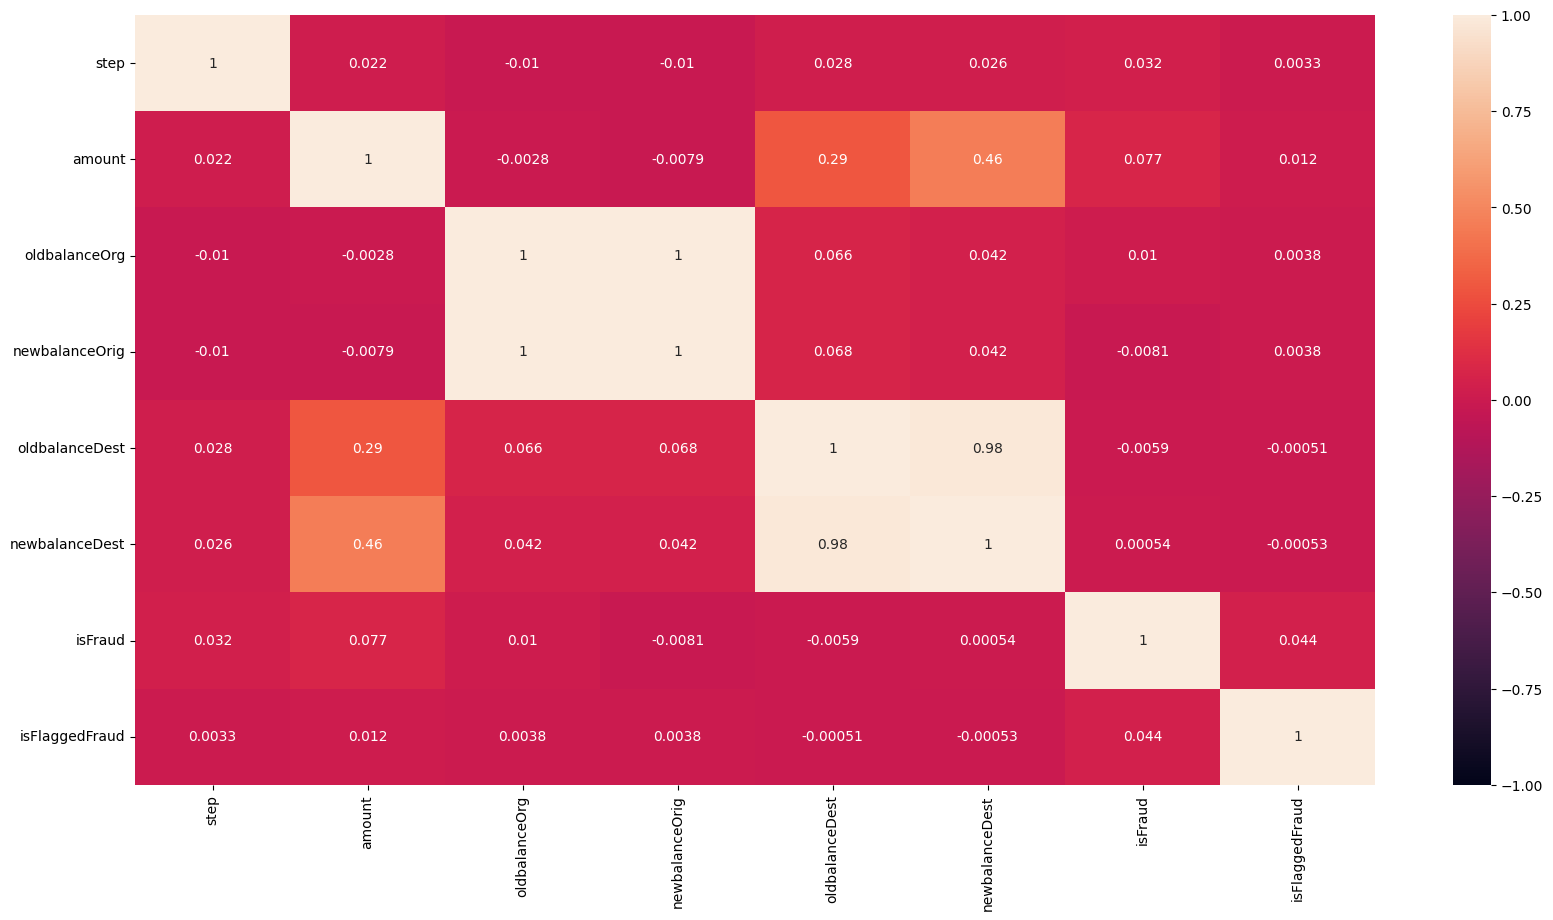

In [10]:
corrmatrix = data.corr()
plt.subplots(figsize =(20,10))
sns.heatmap(corrmatrix,annot=True,vmax=1,vmin=-1)
plt.xticks(rotation=90)

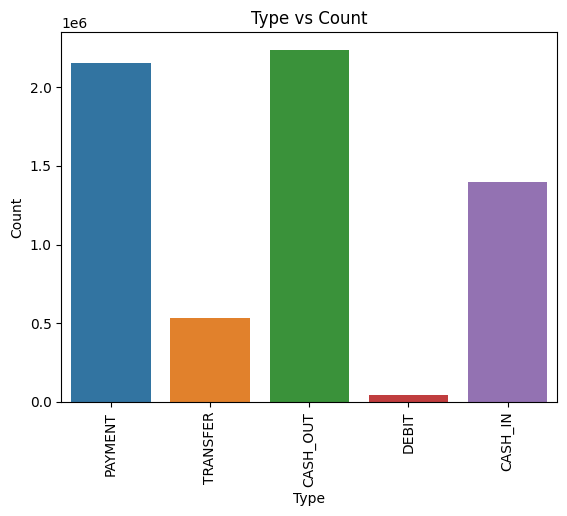

In [11]:
sns.countplot(x=data['type'])
plt.title('Type vs Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [12]:
import plotly.express as px
#pie chart of Type
Type=data['type'].value_counts()
data1=Type.values
labels=Type.index
px.pie(data,values=data1,names=labels,hole=0.5,title="Distribution of Transaction Type")

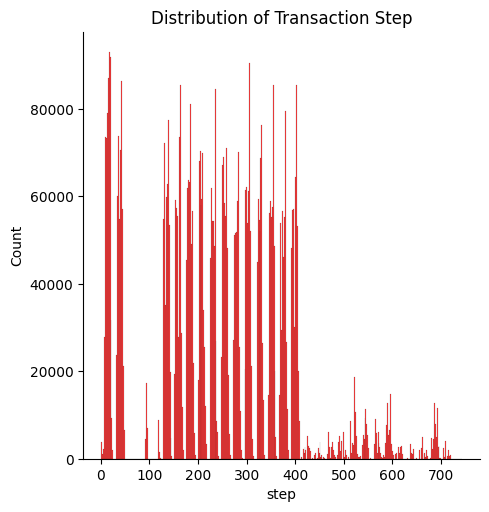

In [13]:
sns.displot(data['step'],color='r')
plt.title('Distribution of Transaction Step')
plt.show()

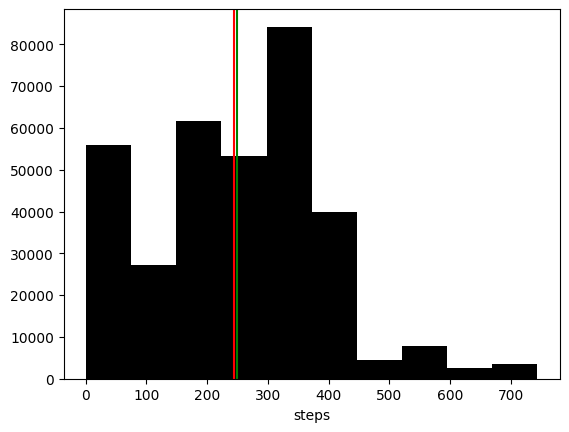

In [14]:
step_amount_avg = data[data.amount>=500000]['step']
plt.hist(step_amount_avg, color = 'black')
plt.axvline(step_amount_avg.mean(), color = 'red')
plt.axvline(step_amount_avg.median(), color = 'green')
plt.xlabel('steps')
plt.show()

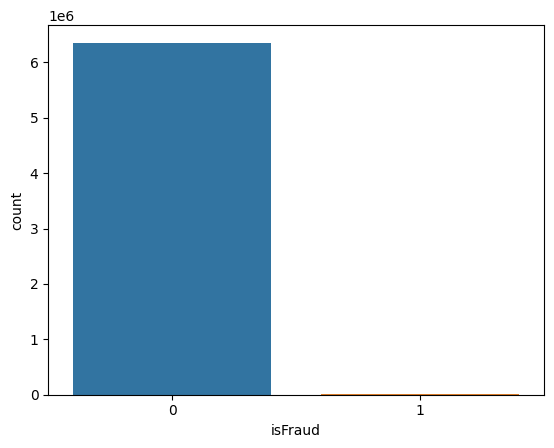

In [15]:
sns.countplot(x=data['isFraud'])
plt.show()

In [16]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [17]:
#From the above visualization we can say that the dataset is imbalanced

In [18]:
noFrauds = data['isFraud'].value_counts()[0]/len(data['isFraud'])*100
frauds = data['isFraud'].value_counts()[1]/len(data['isFraud'])*100

In [19]:
print('No Frauds :',round(noFrauds,2),'%')
print('Frauds :',round(frauds,2),'%')

No Frauds : 99.87 %
Frauds : 0.13 %


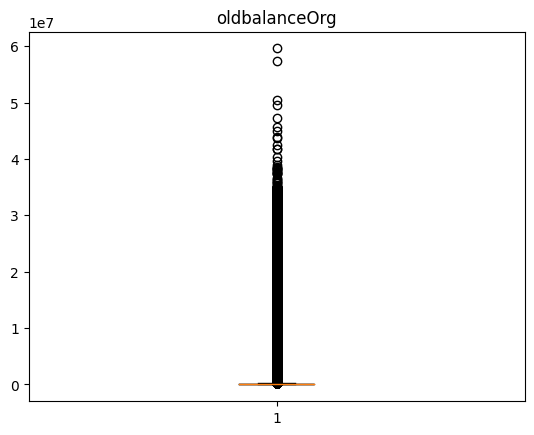

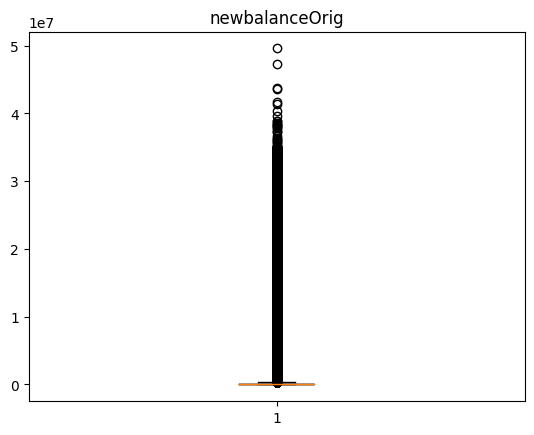

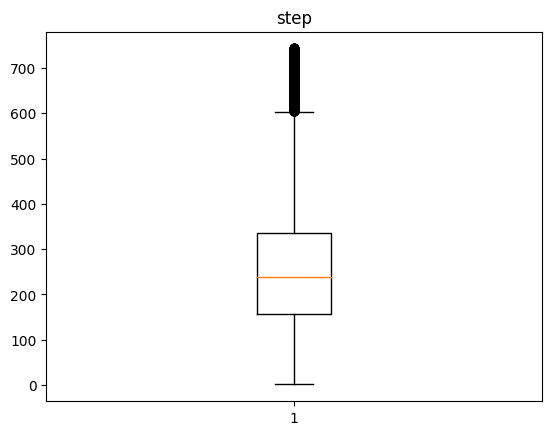

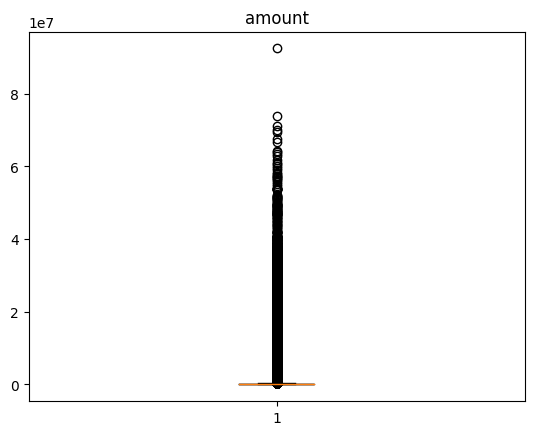

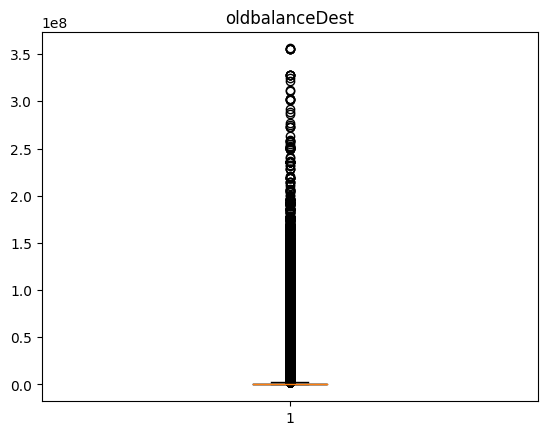

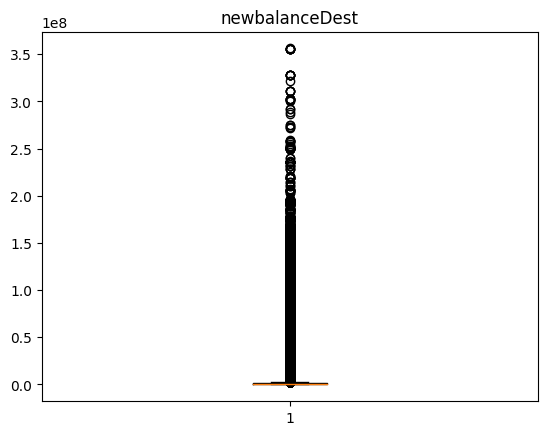

In [20]:
for i in ['oldbalanceOrg','newbalanceOrig','step','amount','oldbalanceDest','newbalanceDest']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [21]:
#droping unwanted columns
data.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [22]:
# Applying One-Hot encoding on type column
data=pd.get_dummies(data=data,columns=['type'],drop_first=True)
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [23]:
# We are using RobustScaler to scale down the numerical features as RobustScaler is less prone to outliers
scale=RobustScaler()
numerical=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
for feature in numerical:
    data[feature]=scale.fit_transform(data[feature].values.reshape(-1,1))
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0,0,0,1,0
1,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0,0,0,1,0
2,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1,0,0,0,1
3,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1,1,0,0,0
4,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0,0,0,1,0


Model fitting

In [24]:
# Splitting our data into target and features
x=data.drop('isFraud',axis=1)
y=data['isFraud']

In [25]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x1,y1=oversample.fit_resample(x,y)

In [26]:
y2=pd.DataFrame(y1)
y2.value_counts()

isFraud
0          6354407
1          6354407
dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

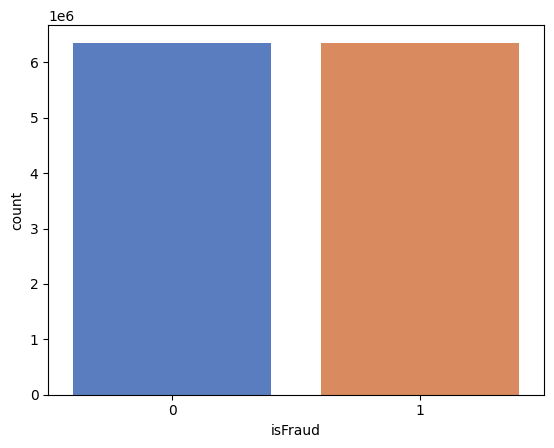

In [27]:
sns.countplot(x=y1,palette='muted')

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=42,test_size=0.25)

MODEL FITTING

In [29]:
#logistic regression
logit_model=LogisticRegression(random_state=42)
logit_model.fit(x_train,y_train)
log_y_pred=logit_model.predict(x_test)

Accuracy: 0.9489557485134729
Confusion Matrix:
 [[1505796   82557]
 [  79621 1509230]]


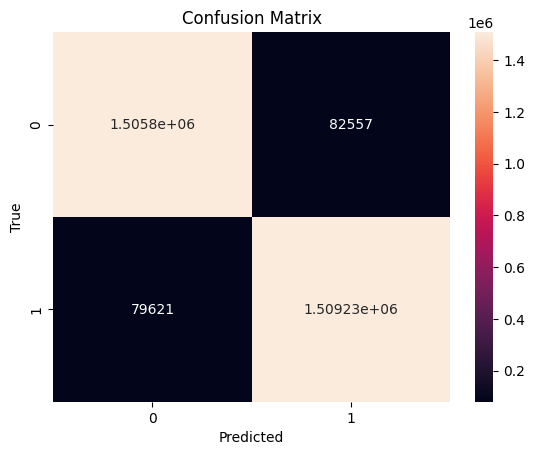

In [31]:
log_accuracy = accuracy_score(y_test, log_y_pred)
print("Accuracy:", log_accuracy)
# Generate the confusion matrix
log_cm = confusion_matrix(y_test, log_y_pred)
print("Confusion Matrix:\n", log_cm)
sns.heatmap(log_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
#Decision tree
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
dt_y_pred=dt_clf.predict(x_test)

Accuracy: 0.9994441653730765
Confusion Matrix:
 [[1587282    1071]
 [    695 1588156]]


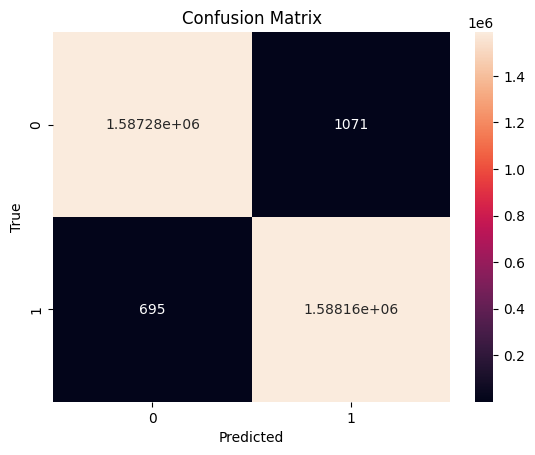

In [33]:
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Accuracy:", dt_accuracy)
# Generate the confusion matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)
print("Confusion Matrix:\n", dt_cm)
sns.heatmap(dt_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
# Random forest
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [35]:
rf_y_pred=rf_clf.predict(x_test)

Accuracy: 0.999470603713202
Confusion Matrix:
 [[1587260    1093]
 [    589 1588262]]


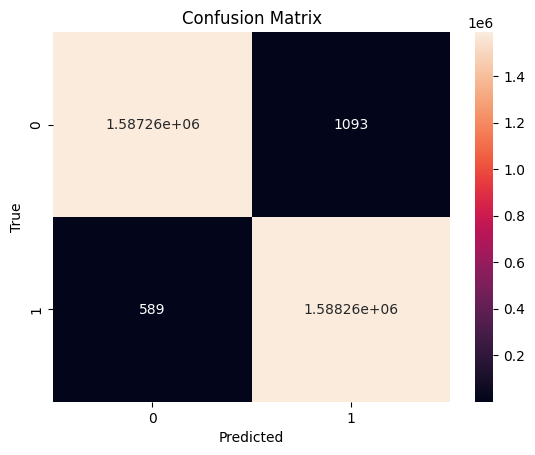

In [36]:
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("Accuracy:", rf_accuracy)
# Generate the confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:\n", rf_cm)
sns.heatmap(rf_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
#Comparing models

In [39]:
alg=['DECISIONTREE','RANDOM FOREST','LOGISTIC REGRESSION']
accuracy=[dt_accuracy,rf_accuracy,log_accuracy]
accuracy_scores=pd.DataFrame({'Algorithms':alg,'Accuracy':accuracy})
accuracy_scores['Accuracy']=accuracy_scores['Accuracy']*100
accuracy_scores

,Algorithms,Accuracy
0,DECISIONTREE,99.944417
1,RANDOM FOREST,99.947060
2,LOGISTIC REGRESSION,94.895575


In [40]:
accuracy_scores.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy
1,RANDOM FOREST,99.947060
0,DECISIONTREE,99.944417
2,LOGISTIC REGRESSION,94.895575


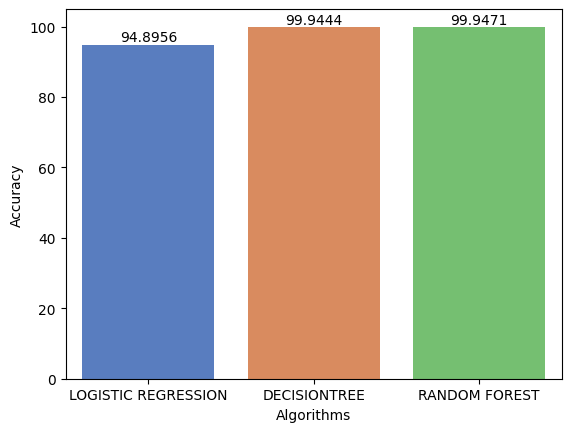

In [41]:
ax= sns.barplot(x='Algorithms',y='Accuracy',palette='muted',data=accuracy_scores.sort_values(by='Accuracy',ascending=True),errwidth=0)
for i in ax.containers:
  ax.bar_label(i,)

In [42]:
#from the above graph,random forest have more accuracy